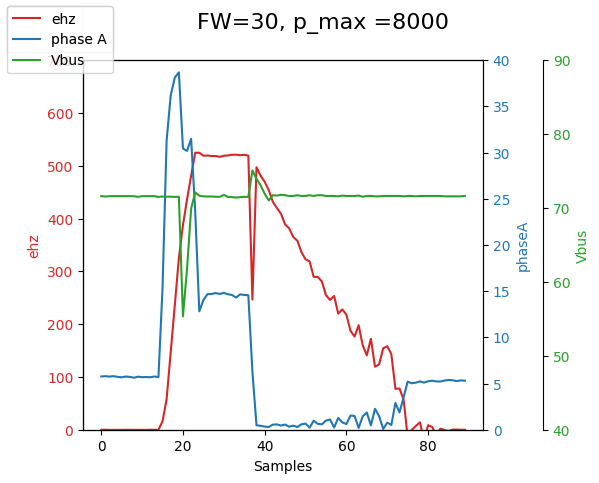

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parse_data # helper script

# URL = input()
# URL = 'https://raw.githubusercontent.com/owhite/ebike_data/main/datasets/first_set'
# page = parse_data.get_web_page(URL)
fname = 'datasets/feb25_FW10.json'
title = 'FW=30, p_max =8000'
page = parse_data.get_file_page(fname)
data = parse_data.make_frame(page)

df = pd.DataFrame(data)

df['phaseA'] = np.sqrt( (df['idq_d'] * df['idq_d']) + (df['idq_q'] * df['idq_q']) )

t = np.arange(len(df['ehz']))

fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)
ax1 = host.twinx()
ax2 = host.twinx()
ax2.spines.right.set_position(("axes", 1.15))

fig.suptitle(title, fontsize=16)
color = 'tab:red'
host.set_ylim(0, 700)
host.set_xlabel("Samples", color='black')
host.tick_params(axis='y', labelcolor=color)
host.set_ylabel("ehz", color=color)
host.plot(t, df['ehz'], color=color, label = 'ehz')
fig.legend(loc = "upper left")

color = 'tab:blue'
ax1.set_ylabel('phaseA', color=color)  
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 40)
ax1.plot(t, df['phaseA'], color=color, label = 'phase A')
fig.legend(loc = "upper left")

offset = 60
color = 'tab:green'
ax2.set_ylabel('Vbus', color=color)  
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(40, 90)
ax2.plot(t, df['vbus'], color=color, label = 'Vbus')
fig.legend(loc = "upper left")

 